In [2]:
import warnings
warnings.filterwarnings('ignore')
import keras

In [6]:
import os

original_dataset_dir = 'Downloads/PetImages'

base_dir = 'Downloads/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
valid_dir = os.path.join(base_dir, 'valid')
os.mkdir(valid_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

valid_cats_dir = os.path.join(valid_dir, 'cats')
os.mkdir(valid_cats_dir)
valid_dogs_dir = os.path.join(valid_dir, 'dogs')
os.mkdir(valid_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [7]:
import shutil

fnames = ['{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    src1 = os.path.join(original_dataset_dir + '/Cat', fname)
    dst1 = os.path.join(train_cats_dir, fname)
    src2 = os.path.join(original_dataset_dir + '/Dog', fname)
    dst2 = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src1, dst1)
    shutil.copyfile(src2, dst2)
    
fnames = ['{}.jpg'.format(i) for i in range(3000, 4500)]
for fname in fnames:
    src1 = os.path.join(original_dataset_dir + '/Cat', fname)
    dst1 = os.path.join(valid_cats_dir, fname)
    src2 = os.path.join(original_dataset_dir + '/Dog', fname)
    dst2 = os.path.join(valid_dogs_dir, fname)
    shutil.copyfile(src1, dst1)
    shutil.copyfile(src2, dst2)

fnames = ['{}.jpg'.format(i) for i in range(4500, 6000)]
for fname in fnames:
    src1 = os.path.join(original_dataset_dir + '/Cat', fname)
    dst1 = os.path.join(test_cats_dir, fname)
    src2 = os.path.join(original_dataset_dir + '/Dog', fname)
    dst2 = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src1, dst1)
    shutil.copyfile(src2, dst2)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')



Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=valid_generator,
                             validation_steps=50)

Epoch 1/30
 16/100 [===>..........................] - ETA: 1:17 - loss: 0.7023 - acc: 0.4813

C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


 99/100 [============================>.] - ETA: 0s - loss: 0.6924 - acc: 0.5197

C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


100/100 [==============================] - 113s 1s/step - loss: 0.6923 - acc: 0.5210 - val_loss: 0.6816 - val_acc: 0.5810
Epoch 2/30
 97/100 [============================>.] - ETA: 2s - loss: 0.6698 - acc: 0.5933

C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: Use

100/100 [==============================] - 111s 1s/step - loss: 0.6697 - acc: 0.5925 - val_loss: 0.6594 - val_acc: 0.6060
Epoch 3/30
 10/100 [==>...........................] - ETA: 1:24 - loss: 0.6416 - acc: 0.5900

C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: U

100/100 [==============================] - 112s 1s/step - loss: 0.6553 - acc: 0.6135 - val_loss: 0.6410 - val_acc: 0.6260
Epoch 4/30
100/100 [==============================] - 110s 1s/step - loss: 0.6307 - acc: 0.6440 - val_loss: 0.6332 - val_acc: 0.6110
Epoch 5/30
100/100 [==============================] - 110s 1s/step - loss: 0.6052 - acc: 0.6680 - val_loss: 0.5815 - val_acc: 0.7090
Epoch 6/30
100/100 [==============================] - 110s 1s/step - loss: 0.5821 - acc: 0.6840 - val_loss: 0.5482 - val_acc: 0.7160
Epoch 7/30
100/100 [==============================] - 110s 1s/step - loss: 0.5676 - acc: 0.7010 - val_loss: 0.5484 - val_acc: 0.7190
Epoch 8/30
100/100 [==============================] - 119s 1s/step - loss: 0.5717 - acc: 0.7075 - val_loss: 0.6233 - val_acc: 0.6790
Epoch 9/30
100/100 [==============================] - 122s 1s/step - loss: 0.5566 - acc: 0.7120 - val_loss: 0.5755 - val_acc: 0.7010
Epoch 10/30
100/100 [==============================] - 119s 1s/step - loss: 0.54

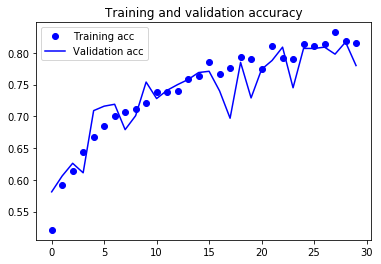

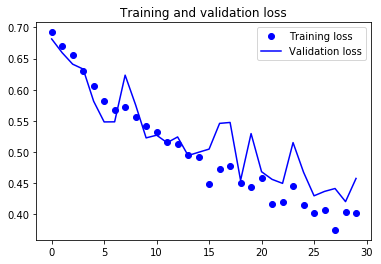

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()